In [1]:
import tabula
import pandas as pd
import numpy as nmp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = tabula.read_pdf("11.12.2019_11.12.2019-8.pdf", java_options="-Dfile.encoding=UTF8", pages="all")

Got stderr: фев 18, 2020 3:30:33 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Times New Roman,BoldItalic are not implemented in PDFBox and will be ignored
фев 18, 2020 3:30:33 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Times New Roman,Bold are not implemented in PDFBox and will be ignored
фев 18, 2020 3:30:33 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Times New Roman are not implemented in PDFBox and will be ignored
фев 18, 2020 3:30:33 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri,Bold are not implemented in PDFBox and will be ignored
фев 18, 2020 3:30:38 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Times New Roman,BoldItalic are not implemented in PDFBox and will be ignored
фев 

In [3]:
df =df[:-1]


In [4]:
df[0].iloc[0]

No                             CIS
Unnamed: 0                     Тип
Future                      Skills
Unnamed: 1                  Юниоры
Unnamed: 2    Название компетенции
Unnamed: 3      Name of competence
Unnamed: 4      Статус компетенции
Unnamed: 5        Блок компетенций
Name: 0, dtype: object

In [5]:
df[0].columns = df[0].iloc[0]

In [6]:
for i in df:
    i.columns = df[0].iloc[0]

In [7]:
DF=pd.concat(df)

In [8]:
DF.shape

(191, 8)

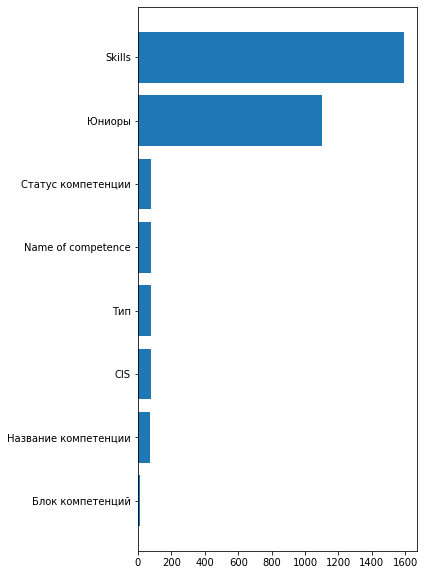

In [9]:
plt.figure(figsize=(5,10))
missing = pd.DataFrame({'column':DF.columns ,'na_percent':DF.isnull().sum()/len(df)*100})
missing.sort_values('na_percent',inplace=True)
plt.barh(missing['column'],width=missing['na_percent']);

In [10]:
DF.columns

Index(['CIS', 'Тип', 'Skills', 'Юниоры', 'Название компетенции',
       'Name of competence', 'Статус компетенции', 'Блок компетенций'],
      dtype='object', name=0)

In [11]:
DF = DF.drop(['Skills'], axis=1)

In [12]:
DF = DF.drop(["Юниоры"], axis=1)

In [13]:
for col in DF.columns:
    print(DF[col].isnull().value_counts())
    print("------------")

False    183
True       8
Name: CIS, dtype: int64
------------
False    183
True       8
Name: Тип, dtype: int64
------------
False    184
True       7
Name: Название компетенции, dtype: int64
------------
False    183
True       8
Name: Name of competence, dtype: int64
------------
False    183
True       8
Name: Статус компетенции, dtype: int64
------------
False    190
True       1
Name: Блок компетенций, dtype: int64
------------


In [14]:
rows = []
for col in DF.columns[:-1]:
    for i in range(191):
        if DF[col].isnull().iloc[i] == True:
            rows.append(i)
    print("____________________________")
    break

____________________________


In [15]:
rows

[2, 4, 5, 11, 17, 19, 21, 23]

In [20]:
DF = DF.dropna(how="any")

In [32]:
DF = DF.iloc[1:]

In [33]:
DF.describe()

,CIS,Тип,Название компетенции,Name of competence,Статус компетенции,Блок компетенций
count,181,181,181,181,181,181
unique,180,4,180,180,5,11
top,No\rCIS,RU,Название компетенции,Name of competence,1) Основная,Производство и инженерные\rтехнологии
freq,2,124,2,2,80,53


In [34]:
DF

,CIS,Тип,Название компетенции,Name of competence,Статус компетенции,Блок компетенций
1,E57,WSE,Администрирование отеля,Hotel receptioning,1) Основная,Сфера услуг
3,8,WSI,Архитектурная обработка камня,Architectural Stonemasonry,1) Основная,технологии
6,17,WSI,Веб-дизайн и разработка,Web Technologies,1) Основная,технологии
7,R56,RU,Ветеринария,Veterinary,1) Основная,Сфера услуг
8,R1,RU,Видеопроизводство,Video Production,1) Основная,Творчество и дизайн
...,...,...,...,...,...,...
9,T32,RU,Цифровой модельер,Digital fashion designer,3) Кандидат в\rпрезентационную,Творчество и дизайн
10,T5,RU,Эксплуатация грузового речного\rтранспорта,Operation of river freight transport,3) Кандидат в\rпрезентационную,Транспорт и логистика
11,T75,RU,Эксплуатация сервисных роботов,Operation of service robots,3) Кандидат в\rпрезентационную,Производство и инженерные\rтехнологии
12,R61,RU,Электрослесарь подземный,Underground Electrician,3) Кандидат в\rпрезентационную,Производство и инженерные\rтехнологии


In [36]:
DF.to_csv("clear_data.csv", encoding="utf-8")